# 2022 NZMSA Data Science Submission.

In [5]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [ ]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

In [ ]:
# get EDA informartion
dataset.describe()

In [ ]:
# check that there are no null values
dataset.info()

In [ ]:
sns.heatmap(dataset.corr(), annot=True, square=True)
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern

C:\Users\Mitchell\AppData\Local\Temp\ipykernel_14484\1512846949.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


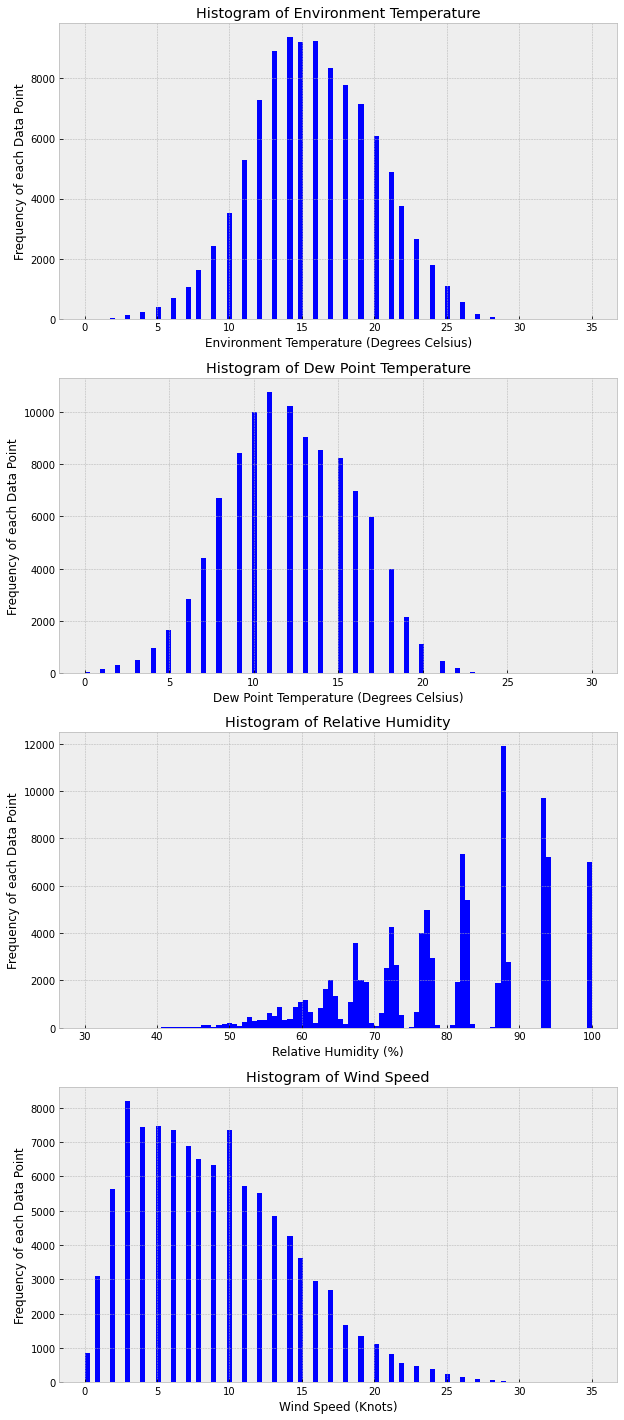

In [70]:
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

ax1.hist(dataset["tmpc"], 100, (0,35), color="blue", histtype="bar", rwidth=1)
ax1.set_title("Histogram of Environment Temperature")
ax1.set_xlabel("Environment Temperature (Degrees Celsius)")
ax1.set_ylabel("Frequency of each Data Point")

ax2.hist(dataset["dwpc"], 100, (0,30), color="blue", histtype="bar", rwidth=1)
ax2.set_title("Histogram of Dew Point Temperature")
ax2.set_xlabel("Dew Point Temperature (Degrees Celsius)")
ax2.set_ylabel("Frequency of each Data Point")


ax3.hist(dataset["relh"], 100, (30,100), color="blue", histtype="bar", rwidth=1)
ax3.set_title("Histogram of Relative Humidity")
ax3.set_xlabel("Relative Humidity (%)")
ax3.set_ylabel("Frequency of each Data Point")

ax4.hist(dataset["sknt"], 100, (0,35), color="blue", histtype="bar", rwidth=1)
ax4.set_title("Histogram of Wind Speed")
ax4.set_xlabel("Wind Speed (Knots)")
ax4.set_ylabel("Frequency of each Data Point")

fig.set_size_inches(10,25)
fig.show()

# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.